In [ ]:
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, transforms
import seaborn as sns

In [ ]:
data = pd.read_csv('train.csv')
y = data['label']
X = data.drop('label', axis=1)
del data

# Running an SVM classifier on our given data

In [ ]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20, stratify=y)

# svm_classifier = BaggingClassifier(base_estimator=SVC(), n_estimators=4, max_samples=5000, bootstrap=False, n_jobs=-1)
svm_classifier = SVC(kernel='linear', max_iter=4215)
svm_classifier.fit(X_train.iloc[:4000], y_train[:4000])

[LibSVM]CPU times: user 4.62 s, sys: 83.9 ms, total: 4.7 s
Wall time: 4.71 s


In [ ]:
svm_classifier.coef_.shape

(45, 784)

In [ ]:
svm_classifier.score(X_test, y_test)

0.9078571428571428

In [ ]:
del X, y

# IRIS

In [ ]:
data = pd.read_csv("Iris.csv").drop('Id', axis=1)
print(data.info())
y = data['Species']
X = data.drop('Species', axis=1)
print()
print(X.shape, y.shape)
print(y.value_counts())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None

(150, 4) (150,)
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20, stratify=y)

In [ ]:
estimators = [SVC(kernel='poly', degree=i) for i in range(10)]
for model in estimators:
    print("degree=", model.degree, "| accuracy=", model.fit(X_train, y_train).score(X_test, y_test))

degree= 0 | accuracy= 0.3333333333333333
degree= 1 | accuracy= 0.9333333333333333
degree= 2 | accuracy= 1.0
degree= 3 | accuracy= 1.0
degree= 4 | accuracy= 1.0
degree= 5 | accuracy= 1.0
degree= 6 | accuracy= 1.0
degree= 7 | accuracy= 1.0
degree= 8 | accuracy= 1.0
degree= 9 | accuracy= 1.0


In [ ]:
estimators = [SVC(kernel='rbf', gamma=i) for i in np.linspace(0.01, 500, 5000)]
gamma = []
accuracy = []
for model in estimators:
    gamma.append(model.gamma)
    accuracy.append(model.fit(X_train, y_train).score(X_test, y_test))
#     print("degree=", model.gamma, "| accuracy=", model.fit(X_train, y_train).score(X_test, y_test))

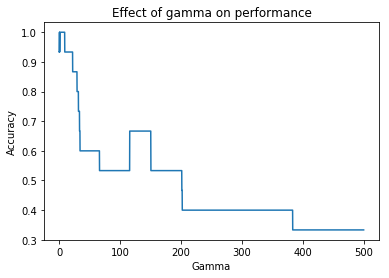

In [ ]:
sns.lineplot(y='Accuracy', x='Gamma', data=pd.DataFrame({'Accuracy': accuracy, 'Gamma': gammaa})).set_title('Effect of gamma on performance').set_x
# plt.show()
plt.savefig("gamma effects")

In [ ]:
for i in range(500):
    print(gamma[i], '\t\t\t', accuracy[i])

0.01 			 0.9333333333333333
0.11001800360072014 			 0.9333333333333333
0.2100360072014403 			 1.0
0.31005401080216044 			 1.0
0.4100720144028806 			 0.9333333333333333
0.5100900180036008 			 0.9333333333333333
0.6101080216043209 			 0.9333333333333333
0.7101260252050411 			 1.0
0.8101440288057612 			 1.0
0.9101620324064813 			 1.0
1.0101800360072015 			 1.0
1.1101980396079216 			 1.0
1.2102160432086417 			 1.0
1.3102340468093618 			 1.0
1.4102520504100822 			 1.0
1.5102700540108023 			 1.0
1.6102880576115224 			 1.0
1.7103060612122425 			 1.0
1.8103240648129626 			 1.0
1.910342068413683 			 1.0
2.010360072014403 			 1.0
2.110378075615123 			 1.0
2.210396079215843 			 1.0
2.310414082816563 			 1.0
2.4104320864172832 			 1.0
2.5104500900180033 			 1.0
2.6104680936187235 			 1.0
2.710486097219444 			 1.0
2.810504100820164 			 1.0
2.910522104420884 			 1.0
3.0105401080216043 			 1.0
3.1105581116223244 			 1.0
3.2105761152230445 			 1.0
3.3105941188237646 			 1.0
3.4106121224244847 			 1.0


In [ ]:
estimators = []
for gamma in np.linspace(0.00001, 0.4, 100):
    estimators.append([SVC(kernel='sigmoid', gamma=gamma, coef0=beta) for beta in np.linspace(0, 10, 100)])
# gamma = []
accuracy = []
count = 0
for list_of_common_gamma_models in estimators:
#     gamma.append(model.gamma)
#     accuracy.append(model.fit(X_train, y_train).score(X_test, y_test))
    accuracy.append([model.fit(X_train, y_train).score(X_test, y_test) for model in list_of_common_gamma_models])
    print(count, end=' ')
    count += 1
#     print("degree=", model.gamma, "| accuracy=", model.fit(X_train, y_train).score(X_test, y_test))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [ ]:
plot_points = np.array(accuracy)

In [ ]:
plot_points.shape

(100, 100)

In [ ]:
listy = [(0.008, 0.8),
        (0.012, 1.2),
        (0.024, 2.4)]

for gamma, beta in listy:
    print(SVC(kernel='sigmoid', gamma=gamma, coef0=beta).fit(X_train, y_train).score(X_test, y_test))

1.0
0.5333333333333333
0.4


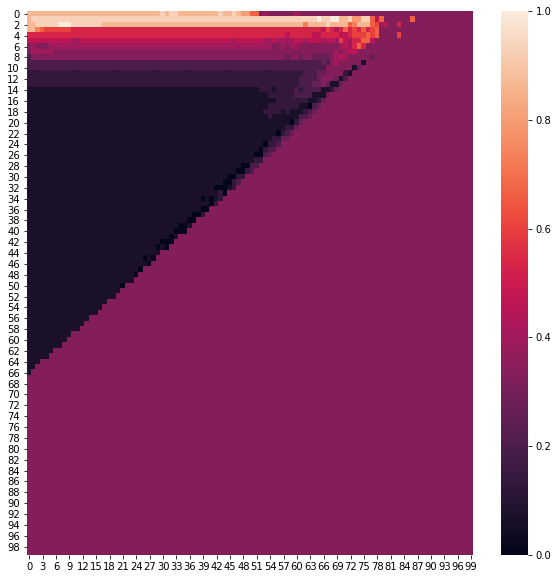

In [ ]:
plt.rcParams['figure.figsize'] = 10, 10
# _, ax = plt.subplots(1,1)
sns.heatmap(plot_points)

# MNIST <br>

train_data.shape = 42000 x 784
train:test = 9:1 <br>
for time restriction purposes, limited train to 4000 samples <br>
(b) svc, kernel='linear', max_iter=4215 <br>
(c) shape of weights = (45, 784) <br>
    shape of intercept = (45,) <br>
    => 45 hyperplanes <br>
    
    classifier accuracy = 90.78%

# IRIS<br>

(d) Accuracy = 100% for all degrees in [4, 5, 8]

(e) Graph shows trend: Accuracy decreases (non-monotonically) with increase in gamma. Accuracy peaks to 100% for gamma = (0.7 ... 8.8) <br>

(f) (gamma, beta)= accuracy
    (0.008, 0.8) = 1.0
    (0.012, 1.2) = 0.5333
    (0.024, 2.4) = 0.4


1.0
0.5333333333333333
0.4